In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import mpl_toolkits.mplot3d.axes3d as p3
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [2]:
import laspy
import open3d as o3d
import pptk

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# K-means

In [2]:
data = pd.read_csv("../k-means_output.csv")
data

,x,y,c
0,4792,57708,2
1,6747,57579,2
2,6490,58493,2
3,8068,56261,2
4,6125,61756,2
...,...,...,...
195,9715,3573,0
196,15083,2319,0
197,8513,2412,0
198,13820,1632,0


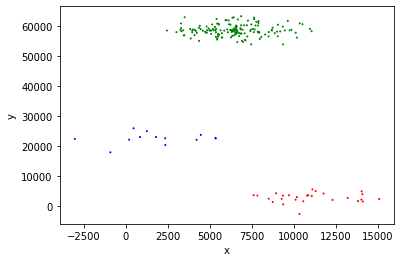

In [3]:
data['color'] = np.where(data.c == 0, 'red', 
                     np.where(data.c ==1, 'blue',
                             np.where(data.c == 2, 'green',
                                     np.where(data.c == 3, 'yellow', 'black'))))

data.plot(kind='scatter', x='x',y='y', s=1, c=data['color'])
plt.show()

## k-means with python lib

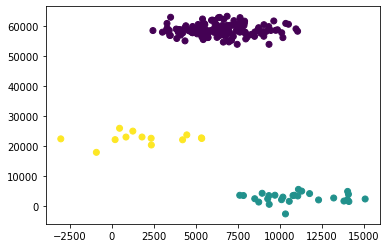

In [4]:
estimator = KMeans(n_clusters = 3)
ids = estimator.fit_predict(data[['x', 'y']])

plt.scatter(data['x'], data['y'], c=ids)  
plt.show()

# K-medoid

In [18]:
data2 = pd.read_csv("../clara_output.csv")
data2

,x,y,c
0,2149,73561,2
1,2160,71698,2
2,39670,54952,0
3,4743,71421,2
4,43429,56525,0
...,...,...,...
195,1229,73007,2
196,91291,33086,2
197,90615,31330,2
198,607,71368,2


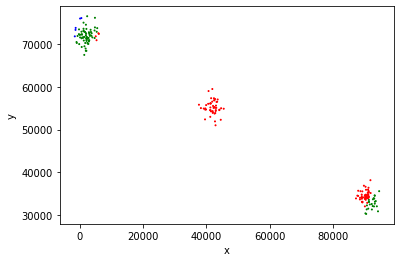

In [19]:
data2['color'] = np.where(data2.c == 0, 'red', 
                     np.where(data2.c ==1, 'blue',
                             np.where(data2.c == 2, 'green',
                                     np.where(data2.c == 3, 'yellow', 'black'))))

data2.plot(kind='scatter', x='x',y='y', s=1, c=data2['color'])
plt.show()

## K-medoid with python lib

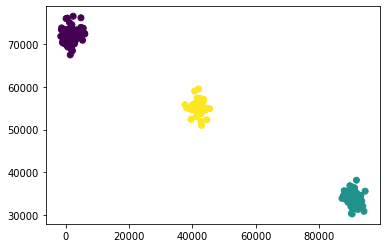

In [20]:
estimator_medoid = KMeans(n_clusters = 3)
ids_medoid = estimator_medoid.fit_predict(data2[['x', 'y']])

plt.scatter(data2['x'], data2['y'], c=ids_medoid)  
plt.show()

In [41]:
data3 = pd.read_csv("../data/street.csv")
data3

,x,y,z,c
0,11.24900,7.260000,0.179,1
1,11.36200,7.277000,0.175,1
2,11.44000,7.268000,0.176,2
3,10.78200,-5.686000,0.420,2
4,10.67700,-6.415000,0.349,0
...,...,...,...,...
11614,270.86700,-1.639000,4.948,255
11615,264.22601,4.254000,4.770,150
11616,270.82800,-5.100000,4.983,151
11617,270.77600,-7.130000,4.918,255


In [10]:
pc_pcd = o3d.io.read_point_cloud("../data/street.pcd")

print(pc_pcd)
print('Shape of points', np.asarray(pc_pcd.points).shape)
print('Shape of colors', np.asarray(pc_pcd.colors).shape)

PointCloud with 11619 points.
Shape of points (11619, 3)
Shape of colors (0, 3)


In [11]:
o3d.visualization.draw_geometries([pc_pcd])

In [4]:
pip install open3d

Defaulting to user installation because normal site-packages is not writeable


Note: you may need to restart the kernel to use updated packages.
